In [7]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\kparekh\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\kparekh\AppData\Local\Temp\tmpa2qqom43
  JVM stdout: C:\Users\kparekh\AppData\Local\Temp\tmpa2qqom43\h2o_kparekh_started_from_python.out
  JVM stderr: C:\Users\kparekh\AppData\Local\Temp\tmpa2qqom43\h2o_kparekh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,15 days
H2O cluster name:,H2O_from_python_kparekh_kww5l8
H2O cluster total nodes:,1
H2O cluster free memory:,3.523 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [8]:
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/product_backorders.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:19053
Cols:23




,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
type,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,real,real,int,enum,enum,enum,enum,enum,enum
mins,1111620.0,-1440.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,-99.0,-99.0,0.0,,,,,,
mean,2059552.760562641,376.36702881435997,7.706036161335188,48.27234556237863,182.9108276911772,344.7398309977431,497.79242114102766,56.11887891670601,168.53445651603428,333.53219965359784,504.25539285151945,48.84070750013119,,2.3114995013908577,-6.5198336220017845,-6.05393533826694,0.8917755734005144,,,,,,
maxs,3284775.0,730722.0,52.0,170920.0,479808.0,967776.0,1418208.0,186451.0,550609.0,1136154.0,1759152.0,85584.0,,13824.0,1.0,1.0,1440.0,,,,,,
sigma,663337.6456498681,7002.071628662684,6.7786650721241895,1465.9992102068286,4304.865591970627,8406.062155159249,12180.570042918363,1544.2177775482571,4581.340080221506,9294.566153218984,14184.14539565362,968.7738680675267,,110.24106014611976,25.975138766871872,25.18449715003253,23.033345417338797,,,,,,
zeros,0,1858,121,15432,12118,11136,10604,10278,8022,6864,6231,9909,,18601,474,401,18585,,,,,,
missing,0,0,1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1113121.0,0.0,8.0,1.0,6.0,6.0,6.0,0.0,4.0,9.0,12.0,0.0,No,1.0,0.9,0.89,0.0,No,No,No,Yes,No,Yes
1,1113268.0,0.0,8.0,0.0,2.0,3.0,4.0,1.0,2.0,3.0,3.0,0.0,No,0.0,0.96,0.97,0.0,No,No,No,Yes,No,Yes
2,1113874.0,20.0,2.0,0.0,45.0,99.0,153.0,16.0,42.0,80.0,111.0,10.0,No,0.0,0.81,0.88,0.0,No,No,No,Yes,No,Yes


In [10]:
y='went_on_backorder'
x=df.columns
x.remove(y)
x.remove('sku')

In [11]:
aml = H2OAutoML(max_models = 15, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [15]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190908_141553,0.949803,0.182932,0.143747,0.228636,0.0522745
GBM_4_AutoML_20190908_141553,0.947962,0.175298,0.164261,0.227912,0.0519439
StackedEnsemble_BestOfFamily_AutoML_20190908_141553,0.947522,0.18655,0.150409,0.230651,0.0531998
GBM_3_AutoML_20190908_141553,0.946596,0.178064,0.1646,0.229324,0.0525894
GBM_5_AutoML_20190908_141553,0.946542,0.175802,0.159569,0.228765,0.0523334
GBM_2_AutoML_20190908_141553,0.944555,0.179833,0.161969,0.230001,0.0529006
GBM_1_AutoML_20190908_141553,0.941535,0.184624,0.154899,0.232223,0.0539276
GBM_grid_1_AutoML_20190908_141553_model_3,0.934986,0.221987,0.160666,0.254705,0.0648746
XRT_1_AutoML_20190908_141553,0.93485,0.223655,0.163566,0.255955,0.0655131
GBM_grid_1_AutoML_20190908_141553_model_1,0.933635,0.198725,0.170075,0.238966,0.0571046


# Stacked Ensemble All Models

In [16]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [17]:
metalearner.coef_norm()

{'Intercept': -2.954317717283313,
 'GBM_4_AutoML_20190908_141553': 0.20072987958769567,
 'GBM_3_AutoML_20190908_141553': 0.06920141077810585,
 'GBM_5_AutoML_20190908_141553': 0.5526602207954039,
 'GBM_2_AutoML_20190908_141553': 1.0843397302769363e-05,
 'GBM_1_AutoML_20190908_141553': 0.11524848009980083,
 'GBM_grid_1_AutoML_20190908_141553_model_3': 0.0,
 'XRT_1_AutoML_20190908_141553': 0.47682027568454843,
 'GBM_grid_1_AutoML_20190908_141553_model_1': 0.3145487078760452,
 'DRF_1_AutoML_20190908_141553': 0.07361725951738238,
 'GBM_grid_1_AutoML_20190908_141553_model_2': 0.0,
 'GLM_grid_1_AutoML_20190908_141553_model_1': 0.059971238827716204,
 'DeepLearning_grid_1_AutoML_20190908_141553_model_1': 0.0,
 'DeepLearning_1_AutoML_20190908_141553': 0.0,
 'DeepLearning_grid_1_AutoML_20190908_141553_model_2': 0.016371406485683845,
 'DeepLearning_grid_1_AutoML_20190908_141553_model_3': 0.0}

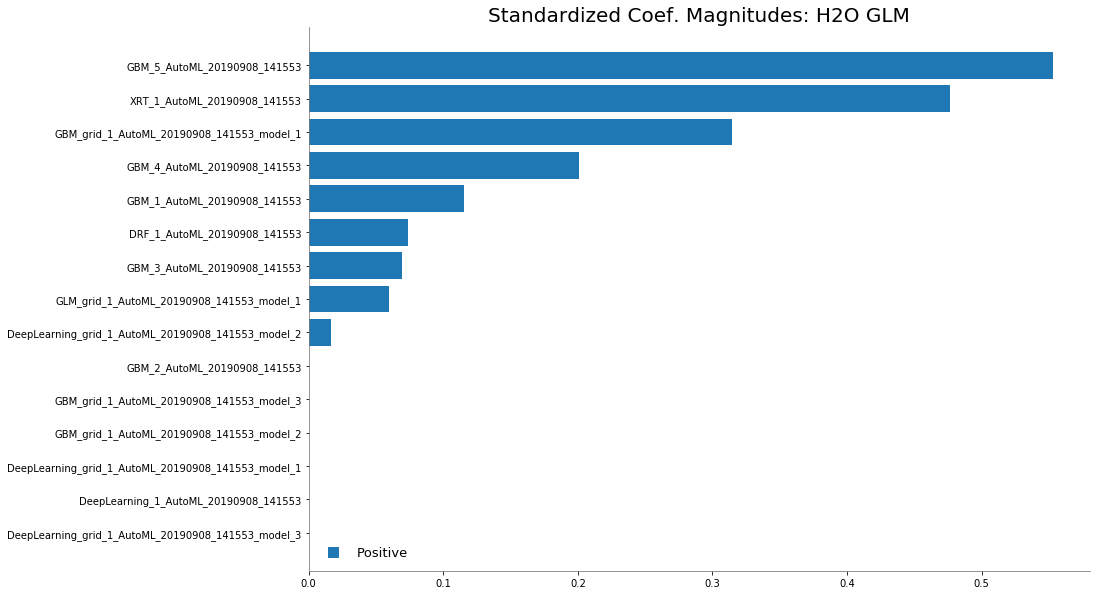

In [18]:
%matplotlib inline
metalearner.std_coef_plot()

# GBM

In [24]:
# Get the best performing GBM
gbm = h2o.get_model([mid for mid in model_ids if "GBM_4" in mid][0])
gbm.model_performance()


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.031324173625030295
RMSE: 0.1769863656472732
LogLoss: 0.11444698289411628
Mean Per-Class Error: 0.06724368418360127
AUC: 0.9823521789625067
pr_auc: 0.9127047415419206
Gini: 0.9647043579250134

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3907967485401148: 

,,No,Yes,Error,Rate
0,No,16421.0,366.0,0.0218,(366.0/16787.0)
1,Yes,397.0,1869.0,0.1752,(397.0/2266.0)
2,Total,16818.0,2235.0,0.04,(763.0/19053.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.390797,0.830482,184.0
1,max f2,0.216093,0.859485,242.0
2,max f0point5,0.537374,0.872747,143.0
3,max accuracy,0.455147,0.961686,165.0
4,max precision,0.993365,1.000000,0.0
5,max recall,0.008841,1.000000,381.0
6,max specificity,0.993365,1.000000,0.0
7,max absolute_mcc,0.455147,0.809772,165.0
8,max min_per_class_accuracy,0.179537,0.932150,258.0
9,max mean_per_class_accuracy,0.179537,0.932756,258.0



Gains/Lift Table: Avg response rate: 11.89 %, avg score: 11.90 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010025,0.944233,8.364186,8.364186,0.994764,0.964402,0.994764,0.964402,0.083848,0.083848,736.418626,736.418626
1,,2,0.020049,0.905866,8.408208,8.386197,1.000000,0.925593,0.997382,0.944997,0.084289,0.168138,740.820830,738.619728
2,,3,0.030022,0.871433,8.408208,8.393509,1.000000,0.888282,0.998252,0.926158,0.083848,0.251986,740.820830,739.350863
3,,4,0.040046,0.836550,8.364186,8.386168,0.994764,0.854347,0.997379,0.908182,0.083848,0.335834,736.418626,738.616843
4,,5,0.050018,0.797514,8.054178,8.319979,0.957895,0.817812,0.989507,0.890165,0.080318,0.416152,705.417847,731.997946
5,,6,0.100037,0.491336,6.784798,7.552389,0.806925,0.654685,0.898216,0.772425,0.339365,0.755516,578.479767,655.238856
6,,7,0.150003,0.241026,2.905778,6.004602,0.345588,0.351940,0.714136,0.632361,0.145190,0.900706,190.577787,500.460222
7,,8,0.200021,0.117746,1.085215,4.774433,0.129066,0.171505,0.567830,0.517117,0.054281,0.954987,8.521471,377.443263
8,,9,0.300005,0.043729,0.300136,3.283261,0.035696,0.072208,0.390483,0.368840,0.030009,0.984996,-69.986448,228.326118
9,,10,0.399990,0.022020,0.097103,2.486826,0.011549,0.030669,0.295762,0.284308,0.009709,0.994704,-90.289733,148.682607


In [26]:
gbm.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,national_inv,1587.062866,1.000000,0.295652
1,sales_9_month,548.950073,0.345891,0.102263
2,sales_1_month,331.924286,0.209144,0.061834
3,sales_6_month,331.294037,0.208747,0.061716
4,local_bo_qty,306.387604,0.193053,0.057077
5,sales_3_month,269.685822,0.169928,0.050239
6,forecast_9_month,238.329895,0.150170,0.044398
7,lead_time,223.206741,0.140641,0.041581
8,perf_12_month_avg,220.959564,0.139225,0.041162
9,forecast_3_month,205.646729,0.129577,0.038310


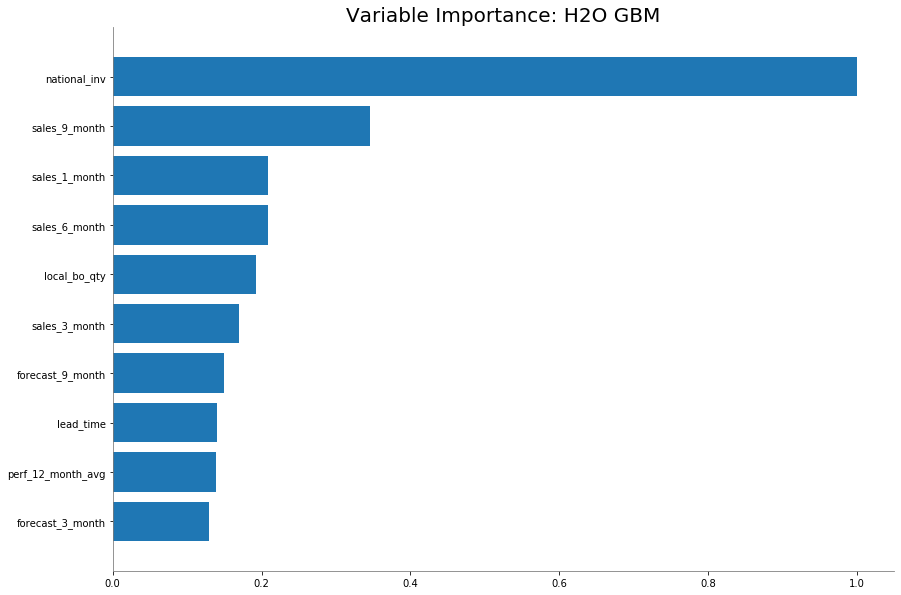

In [27]:
gbm.varimp_plot()

In [28]:
h2o.shutdown(prompt=False)

[WARNING] in <ipython-input-28-02ff3806b010> line 1:
    >>> h2o.shutdown(prompt=False)
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_aeb9 closed.
